# Case- Identifying Key Drivers and Pattern Recognition in a Diversified Stock Portfolio

**Objective**:

As a Data Scientist in the Equity Analysis Department of our bank, you are tasked with analyzing an existing portfolio consisting of 10 selected stocks. The goal of this analysis is to identify the underlying key drivers of stock price movements and to group stocks with similar behavior. In particular, you should examine the interactions between stock prices, the 10-year US Treasury yields, and the S&P 500 Index. Your findings will help us to make the portfolio more efficient in terms of diversification and to identify potential investment risks. Use Principal Component Analysis (PCA), t-SNE for visualization, and clustering methods to categorize the stocks and highlight the primary drivers of price movements.

**Problem Statement**:

The portfolio includes stocks from various sectors that may respond differently to macroeconomic factors and overall market movements. The department requires a detailed analysis to identify the key factors that influence the price movements of individual stocks. Additionally, you need to determine if certain stocks exhibit similar behavior and can be grouped together to enhance diversification strategies and minimize risks.

**Selected Stocks for the Portfolio**:

- Apple Inc. (AAPL) - Technology
- Microsoft Corp. (MSFT) - Technology
- Amazon.com Inc. (AMZN) - Consumer Discretionary
- Johnson & Johnson (JNJ) - Healthcare
- JPMorgan Chase & Co. (JPM) - Financials
- Exxon Mobil Corp. (XOM) - Energy
- Tesla Inc. (TSLA) - Consumer Discretionary / Automotive
- NVIDIA Corp. (NVDA) - Technology
- Procter & Gamble Co. (PG) - Consumer Staples
- Coca-Cola Co. (KO) - Consumer Staples

This selection covers a range of industries and sectors, making the analysis of diversification and risk management within the portfolio particularly insightful.
External Market Data:

**In addition to the stock prices, the following external market data will be included in the analysis**:

- 10-year US Treasury Yields (TNX):These yields provide insights into market interest rate expectations and are a key macroeconomic indicator that can influence stock prices, particularly through the valuation of future cash flows.

- S&P 500 Index (GSPC): The S&P 500 Index serves as a benchmark for the US stock market and is a general indicator of market performance. The correlation of individual stocks with the S&P 500 can reveal how dependent they are on overall market trends

## Loading Data

In [1]:
import yfinance as yf

In [2]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'JNJ', 'JPM', 'XOM', 'TSLA', 'NVDA', 'PG', 'KO', '^GSPC', '^TNX']
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")['Adj Close']

[*********************100%%**********************]  12 of 12 completed


In [3]:
data.head()

Ticker,AAPL,AMZN,JNJ,JPM,KO,MSFT,NVDA,PG,TSLA,XOM,^GSPC,^TNX
Date,,,,,,,,,,,,
2020-01-02,72.876114,94.900497,128.083740,122.852859,47.777248,153.938202,5.973633,109.722351,28.684000,56.088295,3257.850098,1.882
2020-01-03,72.167618,93.748497,126.600815,121.231644,47.516598,152.021393,5.878019,108.984398,29.534000,55.637383,3234.850098,1.788
2020-01-06,72.742653,95.143997,126.442879,121.135246,47.499218,152.414368,5.902669,109.135536,30.102667,56.064560,3246.280029,1.811
2020-01-07,72.400551,95.343002,127.215004,119.075897,47.134300,151.024673,5.974132,108.459824,31.270666,55.605743,3237.179932,1.827
2020-01-08,73.565193,94.598503,127.197495,120.004799,47.221188,153.430283,5.985336,108.922165,32.809334,54.767174,3253.050049,1.874


In [4]:
import matplotlib.pyplot as plt

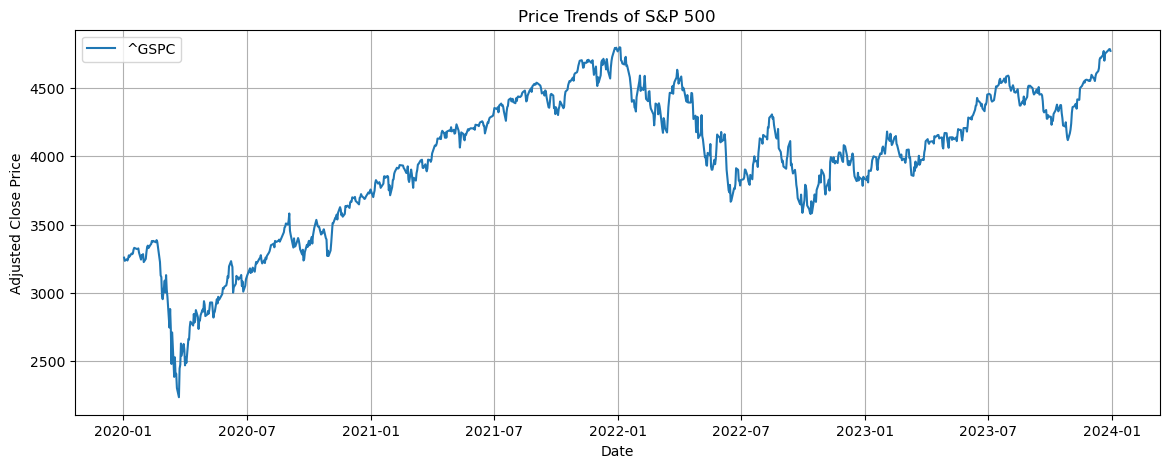

In [5]:
macro_list = ['^GSPC']

plt.figure(figsize=(14,5))

for ticker in macro_list:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Price Trends of S&P 500')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

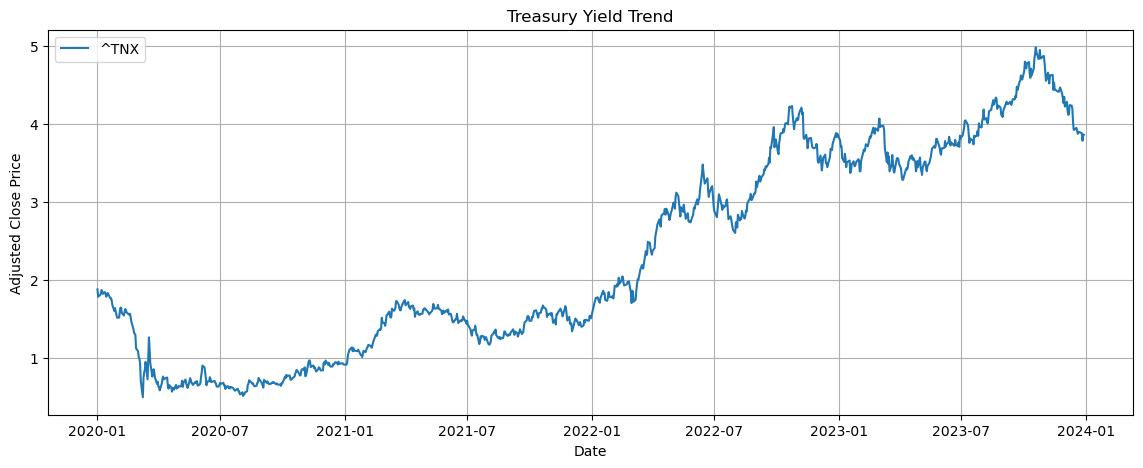

In [6]:
macro_list = ['^TNX']

plt.figure(figsize=(14,5))

for ticker in macro_list:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Treasury Yield Trend')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

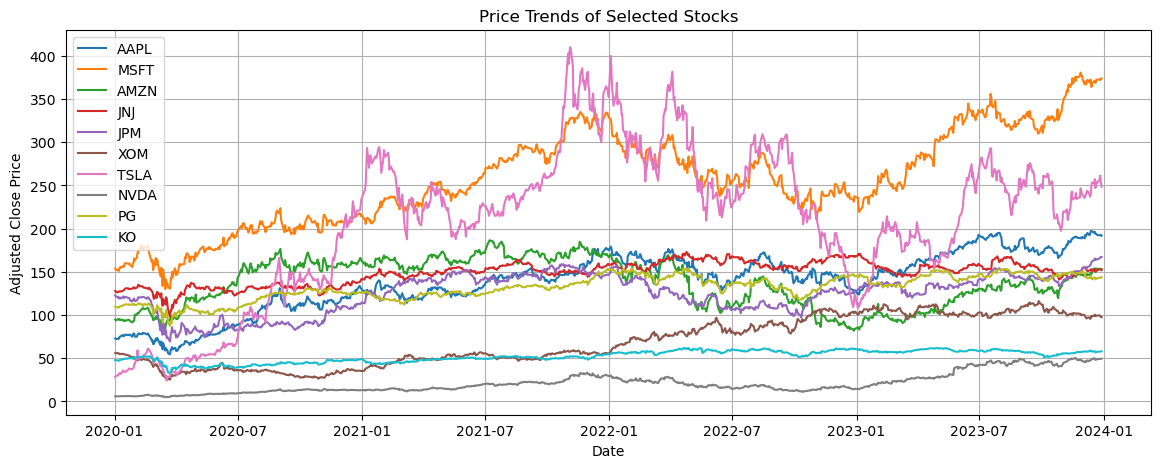

In [7]:
stock_list= ['AAPL', 'MSFT', 'AMZN', 'JNJ', 'JPM', 'XOM', 'TSLA', 'NVDA', 'PG', 'KO']

plt.figure(figsize=(14, 5))

for ticker in stock_list:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Price Trends of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [8]:
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,AMZN,JNJ,JPM,KO,MSFT,NVDA,PG,TSLA,XOM,^GSPC,^TNX
Date,,,,,,,,,,,,
2020-01-03,-0.009722,-0.012139,-0.011578,-0.013196,-0.005456,-0.012452,-0.016006,-0.006726,0.029633,-0.008039,-0.007060,-0.049947
2020-01-06,0.007968,0.014886,-0.001248,-0.000795,-0.000366,0.002585,0.004194,0.001387,0.019255,0.007678,0.003533,0.012864
2020-01-07,-0.004703,0.002092,0.006107,-0.017000,-0.007683,-0.009118,0.012107,-0.006191,0.038801,-0.008184,-0.002803,0.008835
2020-01-08,0.016086,-0.007809,-0.000138,0.007801,0.001843,0.015929,0.001875,0.004263,0.049205,-0.015081,0.004902,0.025725
2020-01-09,0.021241,0.004799,0.002966,0.003651,0.018215,0.012493,0.010983,0.010938,-0.021945,0.007656,0.006655,-0.008538


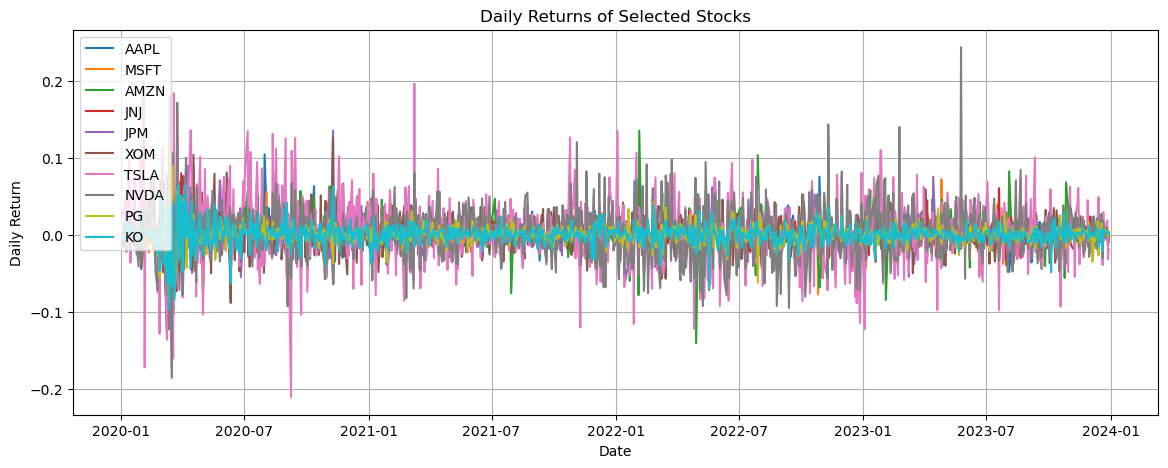

In [9]:
stock_returns_list = ['AAPL', 'MSFT', 'AMZN', 'JNJ', 'JPM', 'XOM', 'TSLA', 'NVDA', 'PG', 'KO']

plt.figure(figsize=(14, 5))

for ticker in stock_returns_list:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.title('Daily Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## PCA-Analysis

In [10]:
returns_centered = returns - returns.mean() #centering of returns
returns_centered.head()

Ticker,AAPL,AMZN,JNJ,JPM,KO,MSFT,NVDA,PG,TSLA,XOM,^GSPC,^TNX
Date,,,,,,,,,,,,
2020-01-03,-0.010908,-0.012889,-0.011840,-0.013737,-0.005749,-0.013546,-0.018690,-0.007092,0.026564,-0.008864,-0.007545,-0.051575
2020-01-06,0.006781,0.014136,-0.001510,-0.001336,-0.000659,0.001490,0.001509,0.001020,0.016185,0.006853,0.003048,0.011236
2020-01-07,-0.005889,0.001342,0.005844,-0.017541,-0.007976,-0.010212,0.009422,-0.006558,0.035731,-0.009009,-0.003288,0.007207
2020-01-08,0.014900,-0.008558,-0.000400,0.007260,0.001550,0.014834,-0.000809,0.003896,0.046135,-0.015905,0.004417,0.024097
2020-01-09,0.020054,0.004049,0.002704,0.003110,0.017922,0.011398,0.008298,0.010571,-0.025015,0.006831,0.006170,-0.010166


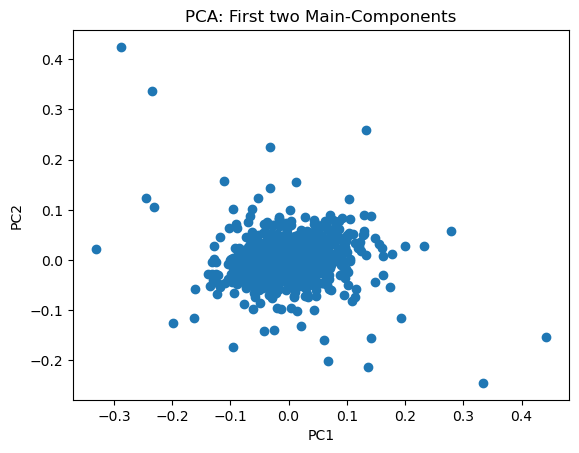

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(returns_centered)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA: First two Main-Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [12]:
import pandas as pd

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=returns_centered.columns)
print(loadings)

             PC1       PC2
Ticker                    
AAPL   -0.286845 -0.039785
AMZN   -0.272705 -0.125568
JNJ    -0.089665  0.061449
JPM    -0.223385  0.174889
KO     -0.119354  0.068453
MSFT   -0.278371 -0.046125
NVDA   -0.465767 -0.176096
PG     -0.102031  0.034310
TSLA   -0.568284 -0.314140
XOM    -0.171822  0.177369
^GSPC  -0.216769  0.018961
^TNX   -0.258588  0.882488


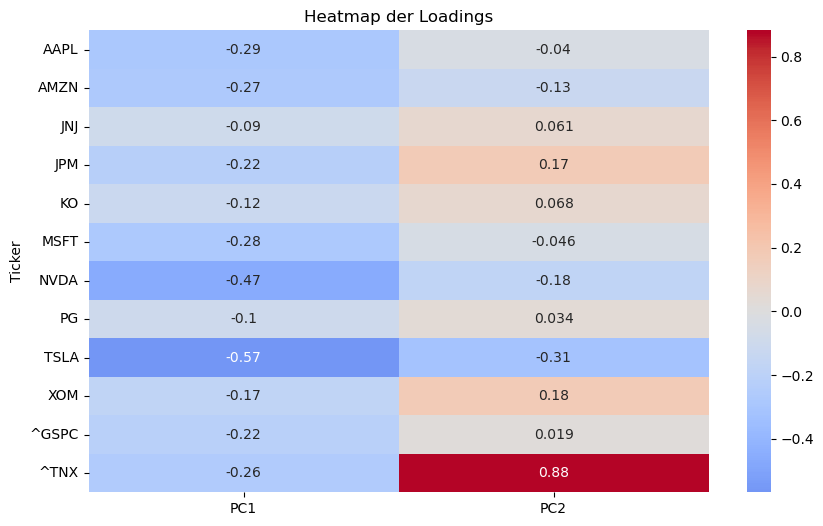

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap der Loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap der Loadings')
plt.show()

**Insights and Reccomendations**:
The PCA analysis was conducted on the returns of the selected stocks, the S&P 500 index, and the 10-year US Treasury yields. The first two principal components (PC1 and PC2) explain a significant portion of the variance in the data:

- **PC1 (Market Component)**:PC1 is primarily influenced by high negative loadings from technology and growth stocks such as Tesla (TSLA), NVIDIA (NVDA), and the S&P 500 index. This indicates that PC1 captures the general market movements, particularly the behavior of growth-oriented sectors.
- **PC2 (Interest Rate Sensitivity / Defensive Component)**: PC2 is dominated by high positive loadings from defensive stocks such as Johnson & Johnson (JNJ) and Procter & Gamble (PG), as well as the 10-year US Treasury yield (TNX). This suggests that PC2 captures the sensitivity of certain stocks to interest rate changes, particularly those in more stable, defensive sectors.

**Recommendations**:

**Diversification Strategy**:
- Given that PC1 is heavily influenced by market-wide factors, particularly in the technology sector, consider balancing your portfolio with assets that are less correlated with these market trends to reduce exposure to broad market risks.The influence of interest rates captured by PC2 suggests that your portfolio may benefit from diversification across assets with varying sensitivity to interest rate changes, balancing growth stocks with defensive stocks.

**Risk Management**:
- Monitor the impact of interest rate fluctuations, as indicated by PC2, on the defensive components of your portfolio. Consider interest rate hedging strategies if necessary, to mitigate risks associated with potential rate hikes.

**Sector Allocation**:
- The distinction between growth and defensive stocks in the PCA results indicates an opportunity to review sector allocation, ensuring that your portfolio is positioned to perform well under different economic condition

## Cluster Analyse

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

C:\Users\phili\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\phili\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


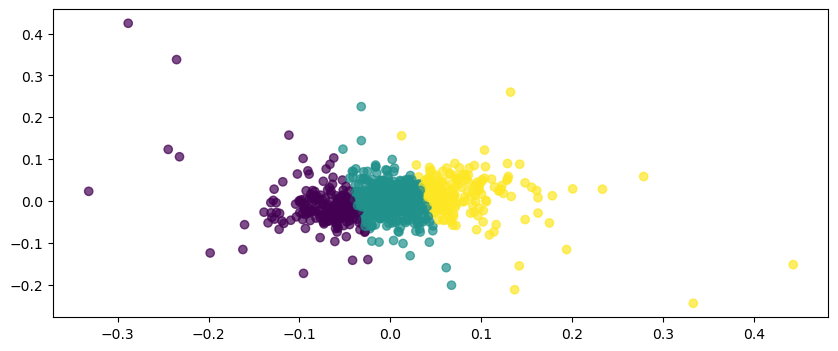

In [16]:
plt.figure(figsize=(10, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)

In [33]:
import pandas as pd

cluster_assignments = pd.DataFrame({'Date': returns.index, 'Cluster': clusters})

returns_with_clusters = pd.DataFrame(returns_centered, index=returns.index)
returns_with_clusters['Cluster'] = clusters


cluster_stats = returns_with_clusters.groupby('Cluster').agg(['mean', 'std'])
print(cluster_stats)


Ticker       AAPL                AMZN                 JNJ                 JPM  \
             mean       std      mean       std      mean       std      mean   
Cluster                                                                         
0        0.020871  0.019556  0.021879  0.022957  0.005185  0.016247  0.013206   
1        0.000660  0.013110  0.001077  0.015916 -0.000061  0.009791  0.000321   
2       -0.023718  0.018308 -0.026033  0.019168 -0.005208  0.015483 -0.014716   

Ticker                   KO            ...        PG                TSLA  \
              std      mean       std  ...      mean       std      mean   
Cluster                                ...                                 
0        0.024524  0.006409  0.015911  ...  0.006434  0.017887  0.048681   
1        0.016260  0.000291  0.010586  ... -0.000228  0.010221 -0.000394   
2        0.023774 -0.007553  0.017509  ... -0.006003  0.016224 -0.049452   

Ticker                  XOM               ^GSPC         

**Insights and Recommendations**:

The cluster analysis was performed on a portfolio of 10 selected stocks, the S&P 500 index, and 10-year Treasury yields, using their daily returns. The goal was to identify groups of stocks that behave similarly across different market conditions, and to gain insights into potential diversification strategies and risk management. Based on the analysis, the stocks were grouped into three distinct clusters. Every Cluster represents a stock group based of similiar daily return behaviour. 

**Cluster 0 (Positive Returns)**:

- This cluster represents periods where stocks generally performed well. High-growth stocks like Tesla (TSLA) and NVIDIA (NVDA) show strong positive average returns in this cluster. These stocks tend to benefit from favorable market conditions, but they are also typically more volatile.
- Insight: These stocks could perform well during bullish or growth market phases but might carry higher risk in downturns.

**Cluster 1 (Neutral Returns)**:

- In this cluster, the stocks exhibit more stable, neutral performance. Defensive stocks like Johnson & Johnson (JNJ) and Coca-Cola (KO) show smaller, more consistent returns here. This suggests these stocks are less affected by extreme market conditions.
- Insight: Stocks in this cluster can provide stability during more neutral or sideways market phases, making them useful for reducing portfolio volatility.

**Cluster 2 (Negative Returns)**:

- This cluster represents periods of underperformance, where most stocks exhibit negative returns. Growth stocks like Tesla (TSLA) and NVIDIA (NVDA) experience larger declines in this cluster, indicating higher vulnerability to market downturns.
- Insight: This cluster indicates which stocks are most exposed to market risks during downturns. These stocks may require risk mitigation strategies, such as hedging, to protect the portfolio.

**Conclusion**:

- Diversification: Combining stocks from Cluster 0 (high growth, high risk) with stocks from Cluster 1 (stable, defensive) can help balance the portfolio, ensuring that while you capture upside potential, you are also mitigating risks in volatile or negative market phases.
- Risk Management: Stocks in Cluster 2 are most vulnerable to market downturns. Implementing risk-hedging strategies, such as using options or diversifying with more stable assets, can help protect the portfolio during these phases

**Some Cluster Visualiazations**

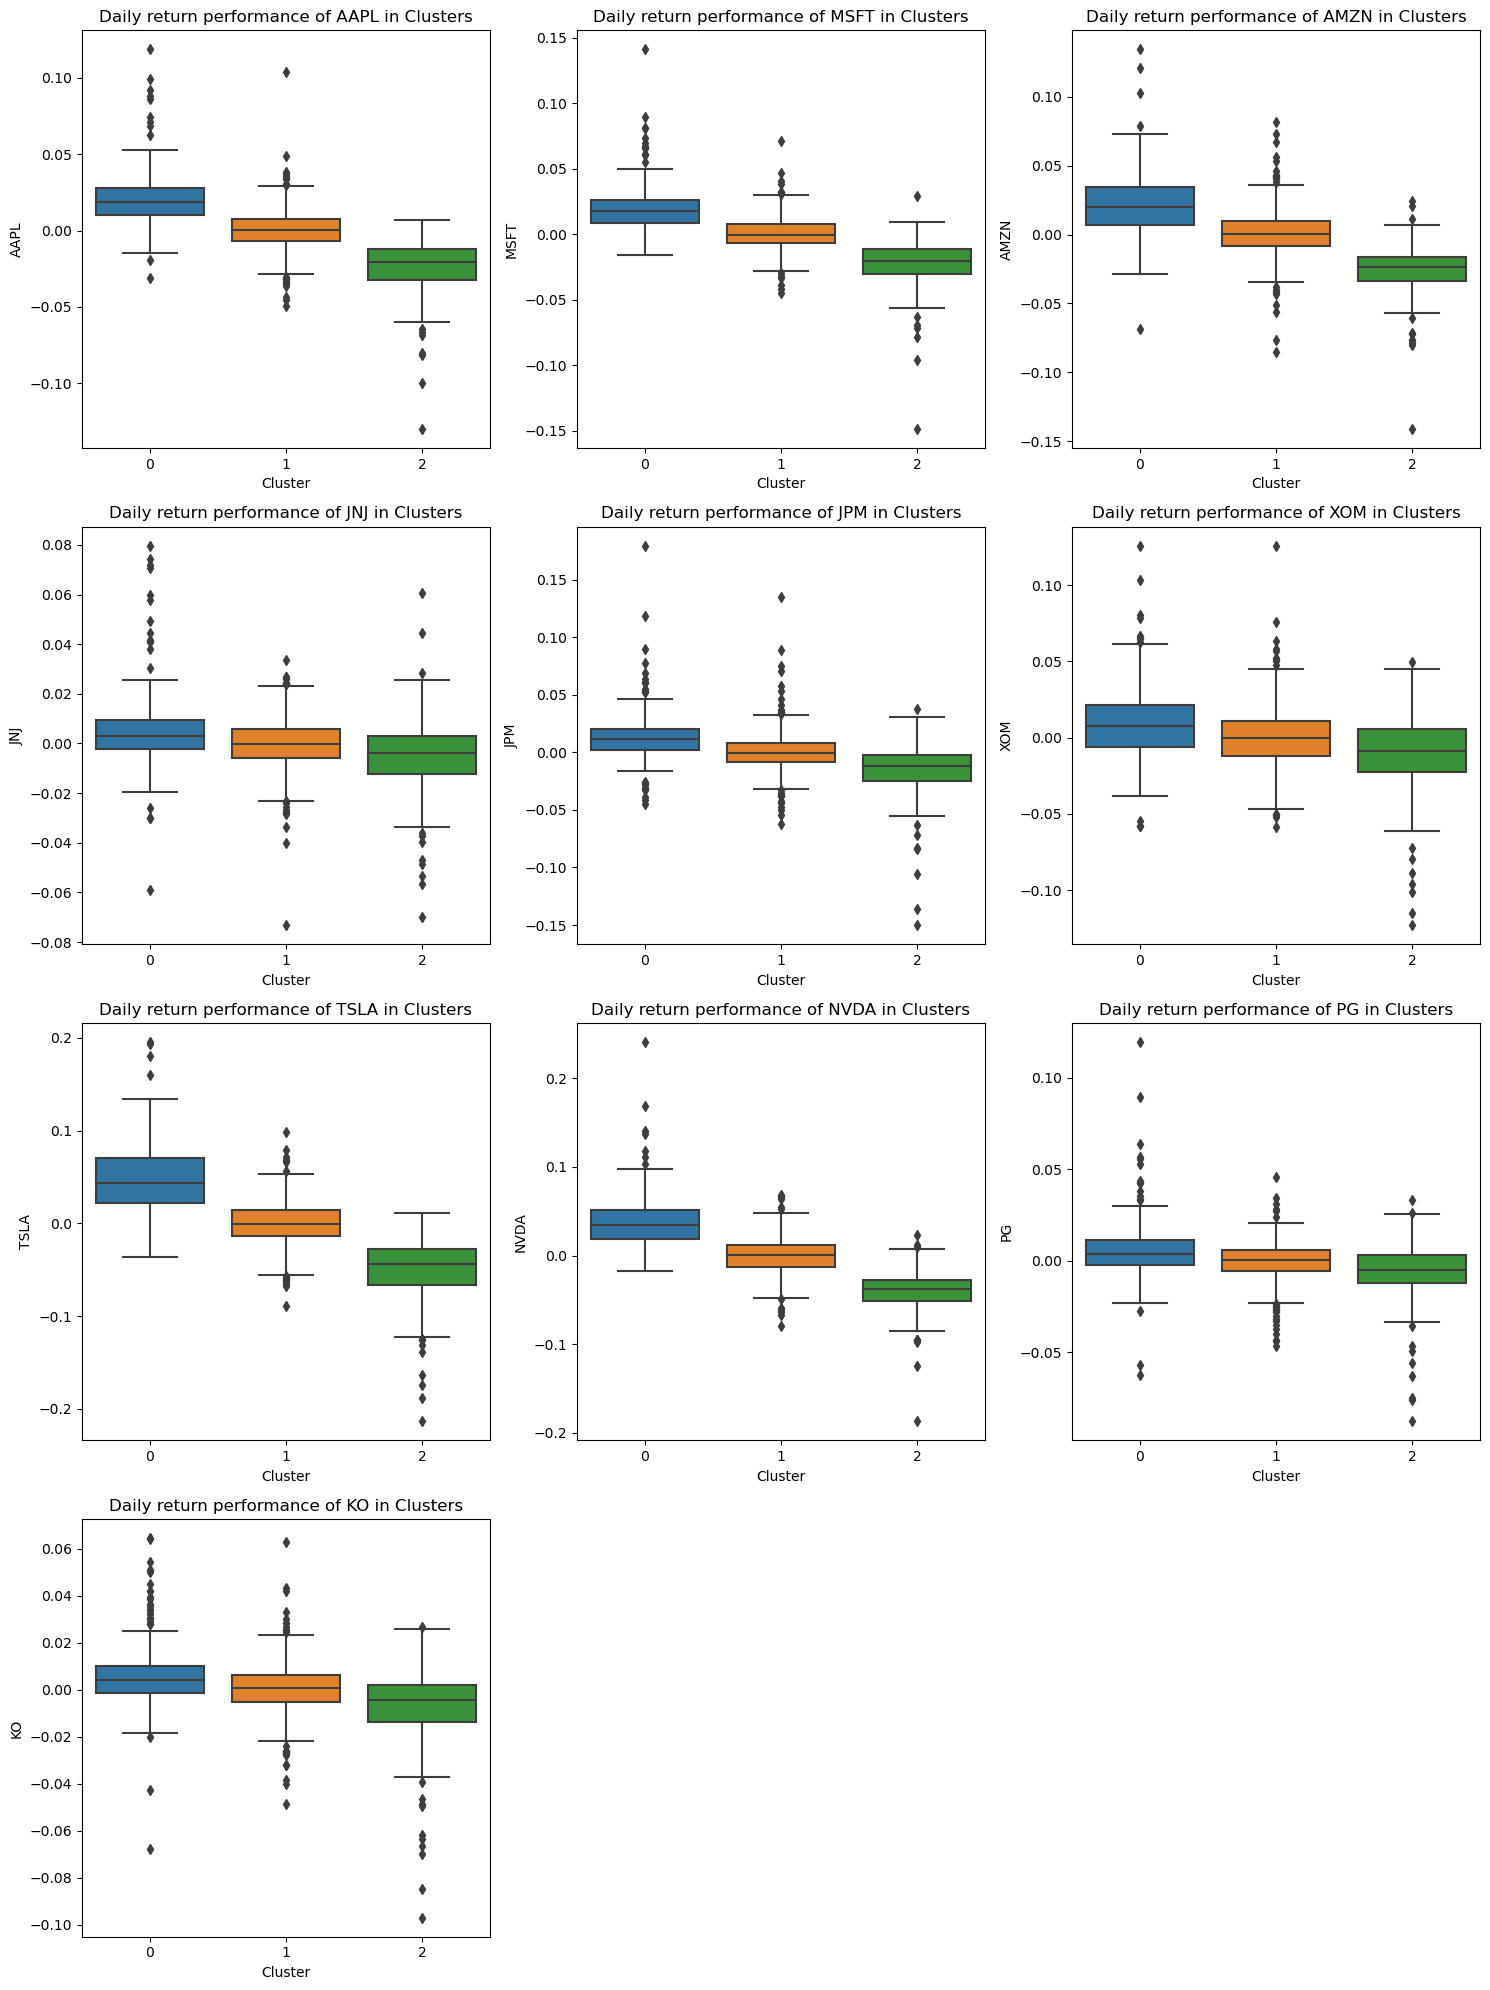

In [34]:
import seaborn as sns

def stock_return_cluster_visualization(data):
    
    stock_list = ['AAPL', 'MSFT', 'AMZN', 'JNJ', 'JPM', 'XOM', 'TSLA', 'NVDA', 'PG', 'KO']
    
    cols = 3
    rows = (len(stock_list) // cols) + (1 if len(stock_list) % cols > 0 else 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20)) 
    axes = axes.flatten()
    
    for i, stock in enumerate(stock_list):
        sns.boxplot(data=data, x='Cluster', y=stock, ax=axes[i])
        axes[i].set_title(f'Daily return performance of {stock} in Clusters')

    for i in range(len(stock_list), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

stock_return_cluster_visualization(returns_with_clusters)

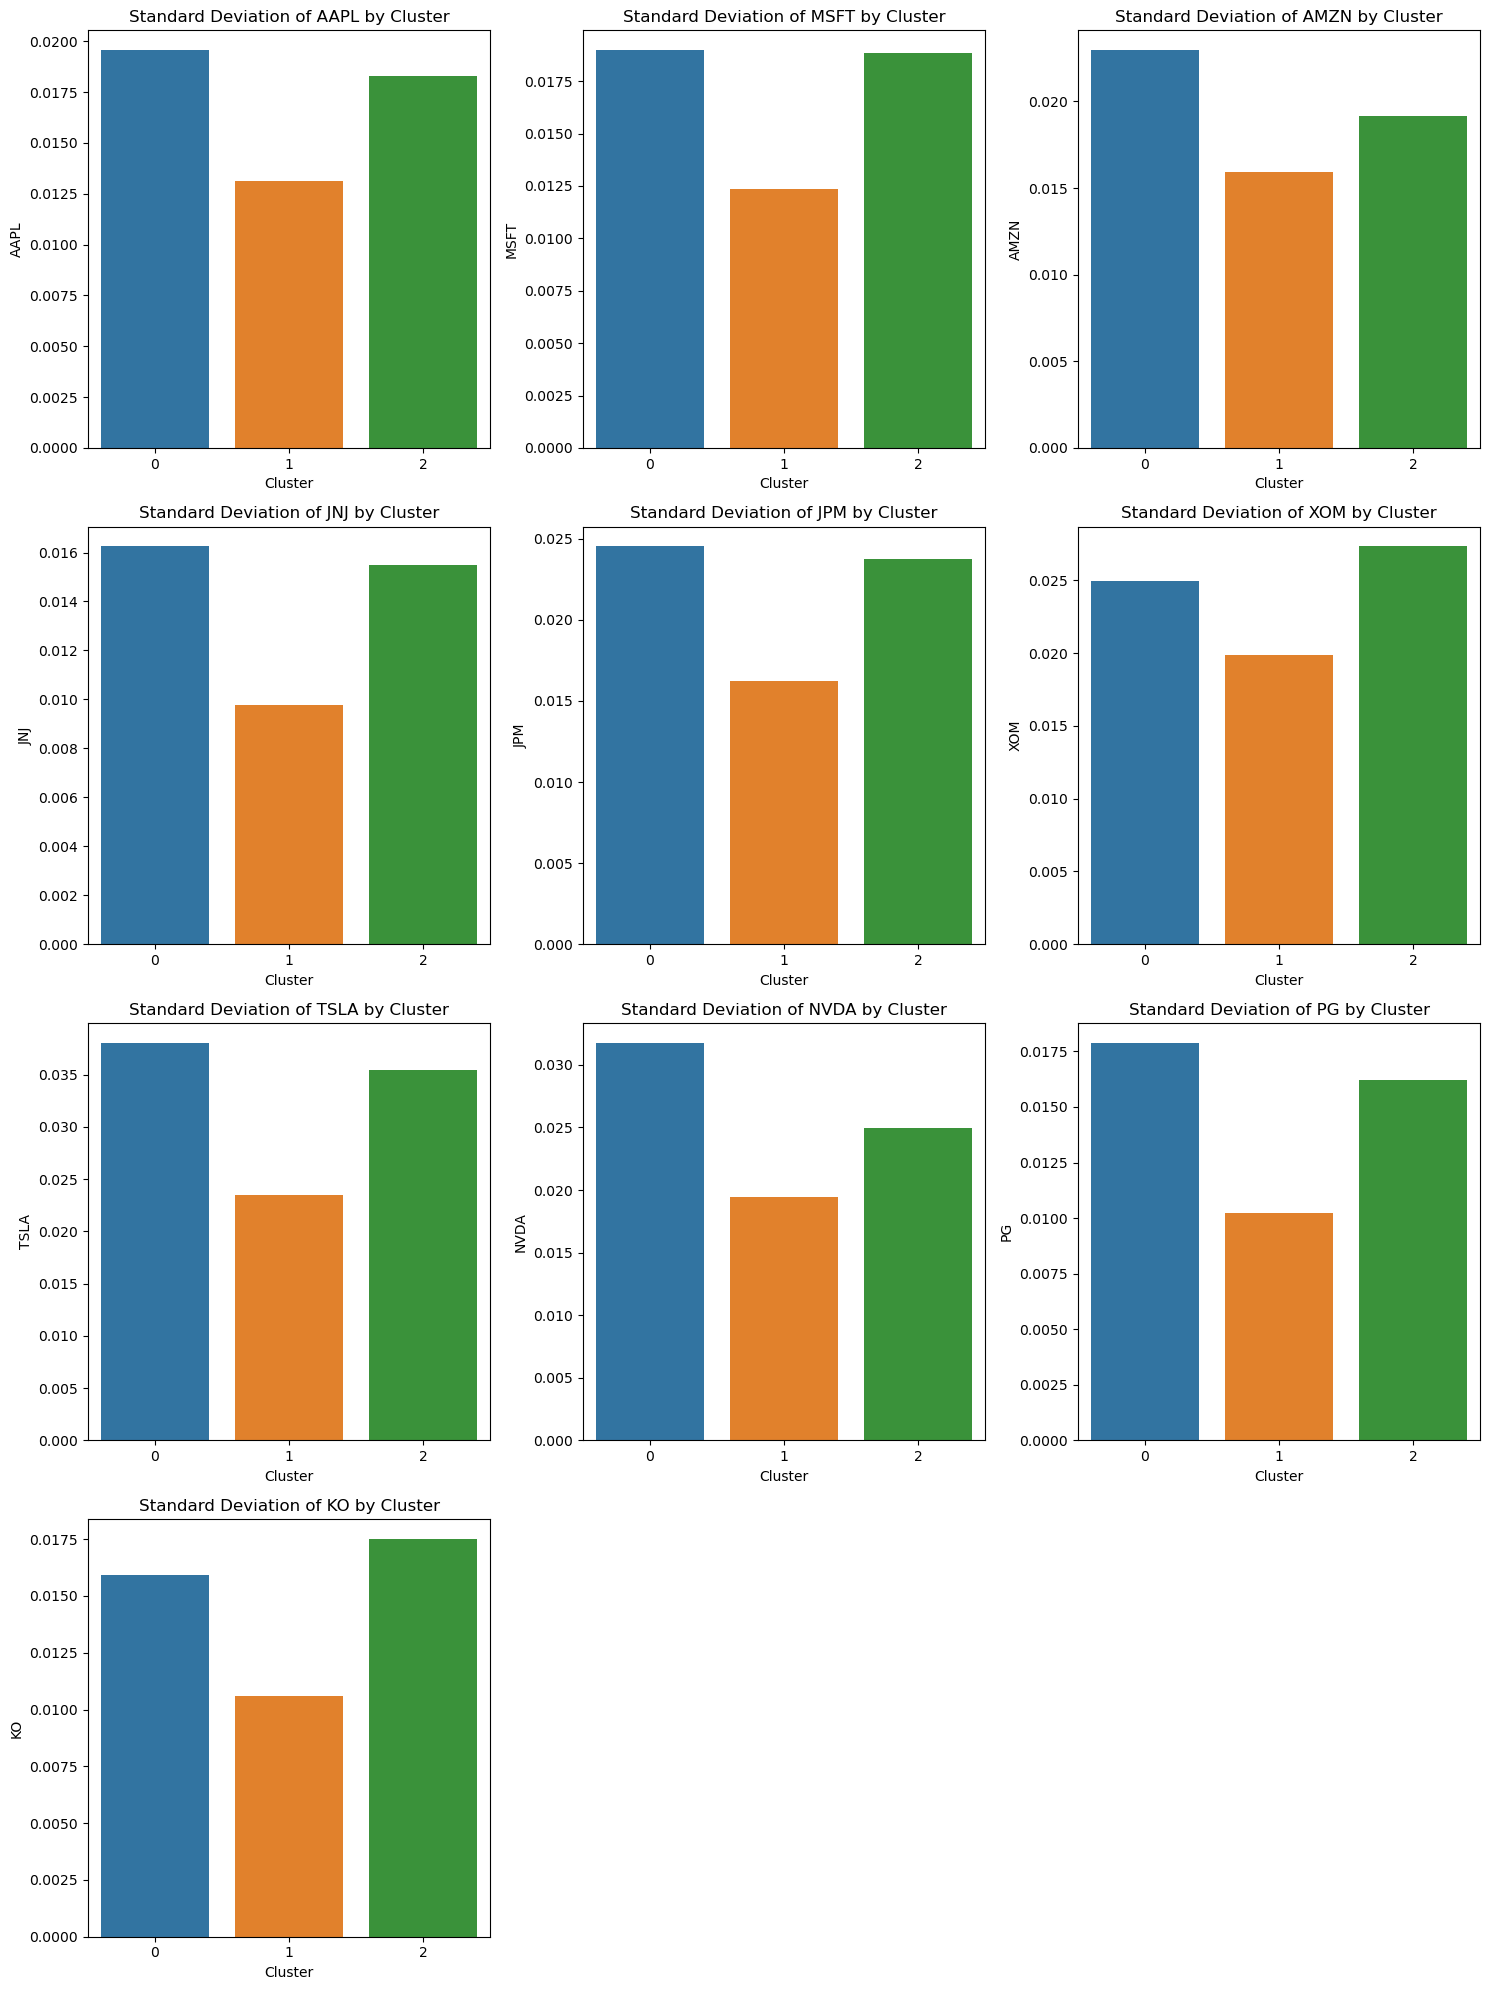

In [36]:
def stock_std_cluster_visualization(data):
    
    stock_list = ['AAPL', 'MSFT', 'AMZN', 'JNJ', 'JPM', 'XOM', 'TSLA', 'NVDA', 'PG', 'KO']
    std_per_cluster = data.groupby('Cluster').std().reset_index()

    cols = 3
    rows = (len(stock_list) // cols) + (1 if len(stock_list) % cols > 0 else 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
    axes = axes.flatten()
    
    for i, stock in enumerate(stock_list):
        sns.barplot(data=std_per_cluster, x='Cluster', y=stock, ax=axes[i])
        axes[i].set_title(f'Standard Deviation of {stock} by Cluster')


    for i in range(len(stock_list), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

stock_std_cluster_visualization(returns_with_clusters)